__Goal__ 

Test:
- MC e-soft normal reward
- MC e-soft custom reward
- SARSA 
- 6-step SARSA
- exp-SARSA
- Q-Learning

10,000 episodes, average of 10 trials

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 10000
gamma = 0.95
num_to_avg = 10
step_size = 0.5
env = gym.make('CartPole-v1')
seed = 123

In [4]:
# Monte Carlo Default Reward
mc_e_soft_ep_lengths_default = []

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma)
#     mc_e_soft_ep_lengths_default.append(ep_lengths)
#     save_array(ep_lengths, f'comparison/mc_default_ep_lengths_{i}.txt')

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'comparison/mc_default_ep_lengths_{i}.txt')
    mc_e_soft_ep_lengths_default.append(array)


In [6]:
# Monte Carlo Custom Reward

np.random.seed(seed)
env.reset(seed=seed)
mc_e_soft_ep_lengths_custom = []
for i in range(num_to_avg):
    Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma, episode_generator_func=generate_episode_reward_central_vertical)
    mc_e_soft_ep_lengths_custom.append(ep_lengths)
    save_array(ep_lengths, f'comparison/mc_custom_ep_lengths_{i}.txt')

# for i in range(num_to_avg):
#     array = load_array(f'comparison/mc_custom_ep_lengths_{i}.txt')
#     mc_e_soft_ep_lengths_custom.append(array)

KeyboardInterrupt: 

In [ ]:
# # SARSA

# np.random.seed(seed)
# env.reset(seed=seed)
# sarsa_ep_lengths = []
# for i in range(num_to_avg):
#     Q, policy, ep_lengths = sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
#     sarsa_ep_lengths.append(ep_lengths)

In [ ]:
# # 6-step SARSA

# np.random.seed(seed)
# env.reset(seed=seed)
# n_step_sarsa_ep_lengths = []
# for i in range(num_to_avg):
#     Q, policy, ep_lengths = nstep_sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma, n=6)
#     n_step_sarsa_ep_lengths.append(ep_lengths)

In [ ]:
# # Expected SARSA

# np.random.seed(seed)
# env.reset(seed=seed)
# exp_sarsa_ep_lengths = []
# for i in range(num_to_avg):
#     Q, policy, ep_lengths = exp_sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
#     exp_sarsa_ep_lengths.append(ep_lengths)

In [ ]:
# Q-Learning

np.random.seed(seed)
env.reset(seed=seed)
q_learning_ep_lengths = []
for i in range(num_to_avg):
    Q, policy, ep_lengths = q_learning(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
    q_learning_ep_lengths.append(ep_lengths)

In [ ]:

# for i in range(num_to_avg):
#     array = load_array(f'comparison//mc_default_ep_lengths_{i}.txt')
#     mc_e_soft_ep_lengths_default.append(array)

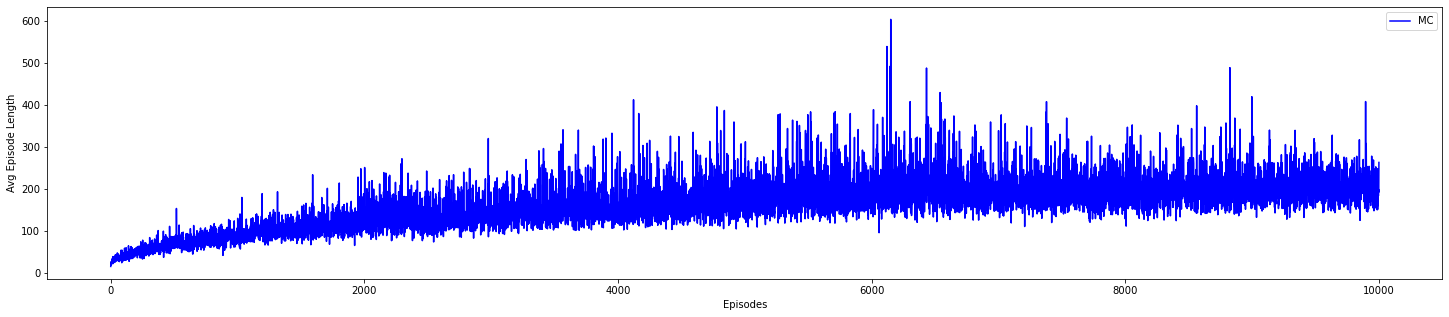

In [8]:
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom], ['MC Epsilon Soft', 'MC Epsilon Soft Custom'])
# plot_episode_lengths([mc_e_soft_ep_lengths_default, q_learning_ep_lengths], ['MC Epsilon Soft','Q-Learning'], smoothing=100)
# plot_episode_lengths([sarsa_ep_lengths], ['SASRSA'], smoothing=10)
plot_episode_lengths([mc_e_soft_ep_lengths_default], ['MC'], smoothing=1, error_range=False)
# plot_episode_lengths([sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'])
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom, sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['MC Epsilon Soft', 'MC Epsilon Soft Custom', 'SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'])

In [ ]:
run_iterations(env=gym.make('CartPole-v1', render_mode='human'), Q=Q, n=5)